## 1. Library

In [ ]:
pip install --upgrade pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 56.6 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5


In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.9/575.9 KB 9.8 MB/s eta 0:00:00


In [ ]:
%matplotlib inline
from warnings import simplefilter
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error,mean_absolute_percentage_error
from sklearn.ensemble import RandomForestRegressor
import shap
shap.initjs()

In [ ]:
def eval(evaluation,y_true,y_train_pred,name):
  a_dict = {}
  a_dict['MAE'] = mean_absolute_error(y_true,y_train_pred)
  a_dict['MSE'] = mean_squared_error(y_true,y_train_pred)
  a_dict['MAPE']= round(mean_absolute_percentage_error(y_true,y_train_pred),6)
  a_dict['R squared'] = r2_score(y_true,y_train_pred)
  a_dict['RMSE'] = np.sqrt(mean_squared_error(y_true,y_train_pred))
  a_dict['RMSLE'] = np.log(np.sqrt(mean_squared_error(y_true,y_train_pred)))
  evaluation[name] = a_dict

## 2. Dataset

In [ ]:
df = pd.read_csv(
    "Rice-Data-2018-2021.csv",
    index_col='Date',
    parse_dates=['Date'],
)

df.head()

Average Price of Premium Quality Rice  \
Date                                                
2018-01-01                               10349.91   
2018-02-01                               10381.74   
2018-03-01                                9892.56   
2018-04-01                                9524.96   
2018-05-01                                9523.88   

            Average Price of Medium Quality Rice  \
Date                                               
2018-01-01                              10177.05   
2018-02-01                              10215.16   
2018-03-01                               9698.23   
2018-04-01                               9220.84   
2018-05-01                               9190.37   

            Average Price of Bad Quality Rice  Harvest Area (10^6 ha)  \
Date                                                                    
2018-01-01                            9792.59                    0.54   
2018-02-01                            9987.10                    1.07   
2018-03-01                            9554.06                    1.77   
2018-04-01                            8991.36                    1.41   
2018-05-01                            9001.50                    1.00   

            Produksi Padi Nasional (10^6 Ton)  \
Date                                            
2018-01-01                               2.78   
2018-02-01                               5.74   
2018-03-01                               9.68   
2018-04-01                               7.60   
2018-05-01                               4.90   

            Produksi Beras Nasional (10^6 Ton)  Productivity (ku/ha)  
Date                                                                  
2018-01-01                                1.59                 51.48  
2018-02-01                                3.29                 53.64  
2018-03-01                                5.55                 54.69  
2018-04-01                                4.36                 53.90  
2018-05-01                                2.81                 49.00

In [ ]:
df = df.iloc[24:,:]

In [ ]:
df['Date'] = df.index
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d') 
df['Month'] = df['Date'].dt.month
df['Time'] = np.arange(len(df.index))
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24 entries, 2020-01-01 to 2021-12-01
Data columns (total 10 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   Average Price of Premium Quality Rice  24 non-null     float64       
 1   Average Price of Medium Quality Rice   24 non-null     float64       
 2   Average Price of Bad Quality Rice      24 non-null     float64       
 3   Harvest Area (10^6 ha)                 24 non-null     float64       
 4   Produksi Padi Nasional (10^6 Ton)      24 non-null     float64       
 5   Produksi Beras Nasional (10^6 Ton)     24 non-null     float64       
 6   Productivity (ku/ha)                   24 non-null     float64       
 7   Date                                   24 non-null     datetime64[ns]
 8   Month                                  24 non-null     int64         
 9   Time                                   24 non-n

In [ ]:
df

Average Price of Premium Quality Rice  \
Date                                                
2020-01-01                               10032.66   
2020-02-01                               10080.80   
2020-03-01                               10082.43   
2020-04-01                               10018.19   
2020-05-01                                9826.63   
2020-06-01                                9918.95   
2020-07-01                                9931.71   
2020-08-01                                9962.65   
2020-09-01                                9871.12   
2020-10-01                                9812.90   
2020-11-01                                9714.50   
2020-12-01                                9787.86   
2021-01-01                                9780.19   
2021-02-01                                9772.10   
2021-03-01                                9606.97   
2021-04-01                                9549.76   
2021-05-01                                9627.08   
2021-06-01                                9537.16   
2021-07-01                                9401.61   
2021-08-01                                9499.36   
2021-09-01                                9455.56   
2021-10-01                                9449.47   
2021-11-01                                9539.29   
2021-12-01                                9672.54   

            Average Price of Medium Quality Rice  \
Date                                               
2020-01-01                               9805.40   
2020-02-01                               9844.13   
2020-03-01                               9826.68   
2020-04-01                               9671.03   
2020-05-01                               9526.55   
2020-06-01                               9445.31   
2020-07-01                               9316.30   
2020-08-01                               9334.90   
2020-09-01                               9404.58   
2020-10-01                               9462.81   
2020-11-01                               9384.98   
2020-12-01                               9382.69   
2021-01-01                               9404.74   
2021-02-01                               9386.31   
2021-03-01                               9153.68   
2021-04-01                               8978.86   
2021-05-01                               8909.50   
2021-06-01                               8906.67   
2021-07-01                               8886.90   
2021-08-01                               8915.75   
2021-09-01                               8962.39   
2021-10-01                               9010.82   
2021-11-01                               9071.94   
2021-12-01                               9128.44   

            Average Price of Bad Quality Rice  Harvest Area (10^6 ha)  \
Date                                                                    
2020-01-01                            9518.85                    0.32   
2020-02-01                            9521.95                    0.47   
2020-03-01                            9460.76                    1.19   
2020-04-01                            8989.00                    1.86   
2020-05-01                            8972.52                    1.30   
2020-06-01                            8926.15                    0.74   
2020-07-01                            8919.58                    0.89   
2020-08-01                            8986.32                    1.20   
2020-09-01                            9026.05                    1.02   
2020-10-01                            9146.54                    0.78   
2020-11-01                            9094.69                    0.57   
2020-12-01                            9055.50                    0.29   
2021-01-01                            9036.42                    0.41   
2021-02-01                            9145.73                    0.77   
2021-03-01                            8741.80                    1.78   
2021-04-01                            8

In [ ]:
df.describe()

Average Price of Premium Quality Rice  \
count                              24.000000   
mean                             9747.145417   
std                               212.593903   
min                              9401.610000   
25%                              9547.142500   
50%                              9776.145000   
75%                              9922.140000   
max                             10082.430000   

       Average Price of Medium Quality Rice  \
count                             24.000000   
mean                            9296.723333   
std                              304.976082   
min                             8886.900000   
25%                             9002.830000   
50%                             9358.795000   
75%                             9449.685000   
max                             9844.130000   

       Average Price of Bad Quality Rice  Harvest Area (10^6 ha)  \
count                          24.000000               24.000000   
mean                         8942.157917                0.875000   
std                           284.344975                0.425093   
min                          8481.430000                0.290000   
25%                          8706.567500                0.557500   
50%                          8949.335000                0.785000   
75%                          9065.297500                1.100000   
max                          9521.950000                1.860000   

       Produksi Padi Nasional (10^6 Ton)  Produksi Beras Nasional (10^6 Ton)  \
count                          24.000000                           24.000000   
mean                            4.551250                            2.612500   
std                             2.177376                            1.283356   
min                             1.620000                            0.930000   
25%                             3.680000                            1.800000   
50%                             4.060000                            2.370000   
75%                             4.760000                            3.217500   
max                             9.670000                            5.600000   

       Productivity (ku/ha)      Month       Time  
count             24.000000  24.000000  24.000000  
mean              54.335833   6.500000  11.500000  
std               13.590575   3.526299   7.071068  
min               30.380000   1.000000   0.000000  
25%               50.207500   3.750000   5.750000  
50%               52.115000   6.500000  11.500000  
75%               55.152500   9.250000  17.250000  
max               86.380000  12.000000  23.000000

# 3. Exploratory Data Analysis (EDA)

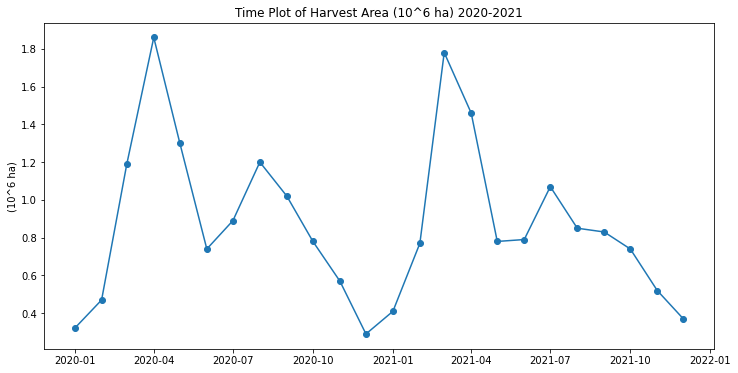

In [ ]:
fig = plt.figure(figsize=(12, 6))
plt.plot(df['Harvest Area (10^6 ha)'],marker='o') 
plt.title('Time Plot of Harvest Area (10^6 ha) 2020-2021')
plt.ylabel("(10^6 ha)")
plt.show()

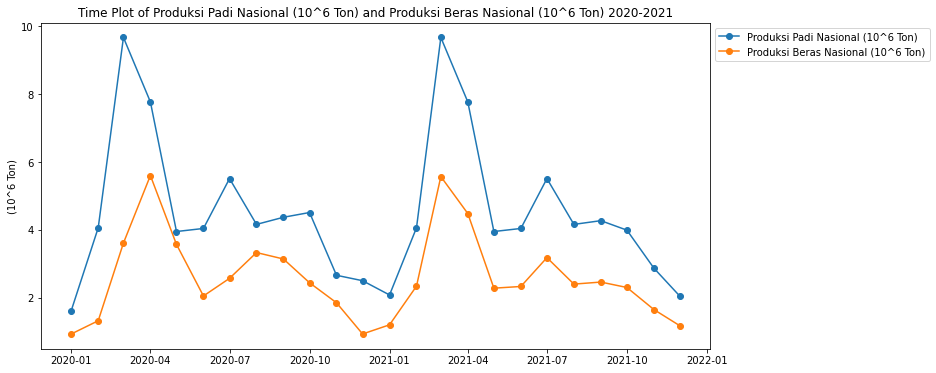

In [ ]:
fig = plt.figure(figsize=(12, 6))
plt.plot(df['Produksi Padi Nasional (10^6 Ton)'],marker='o',label = 'Produksi Padi Nasional (10^6 Ton)') 
plt.plot(df['Produksi Beras Nasional (10^6 Ton)'],marker='o',label = 'Produksi Beras Nasional (10^6 Ton)') 
plt.title('Time Plot of Produksi Padi Nasional (10^6 Ton) and Produksi Beras Nasional (10^6 Ton) 2020-2021')
plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper left')
plt.ylabel("(10^6 Ton)")
plt.show()

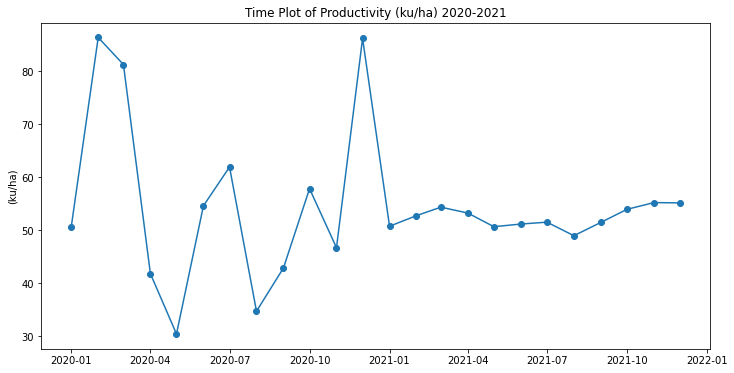

In [ ]:
fig = plt.figure(figsize=(12, 6))
plt.plot(df['Productivity (ku/ha)'],marker='o') 
plt.title('Time Plot of Productivity (ku/ha) 2020-2021')
plt.ylabel("(ku/ha)")
plt.show()

In [ ]:
df = df.drop(columns=['Date'])

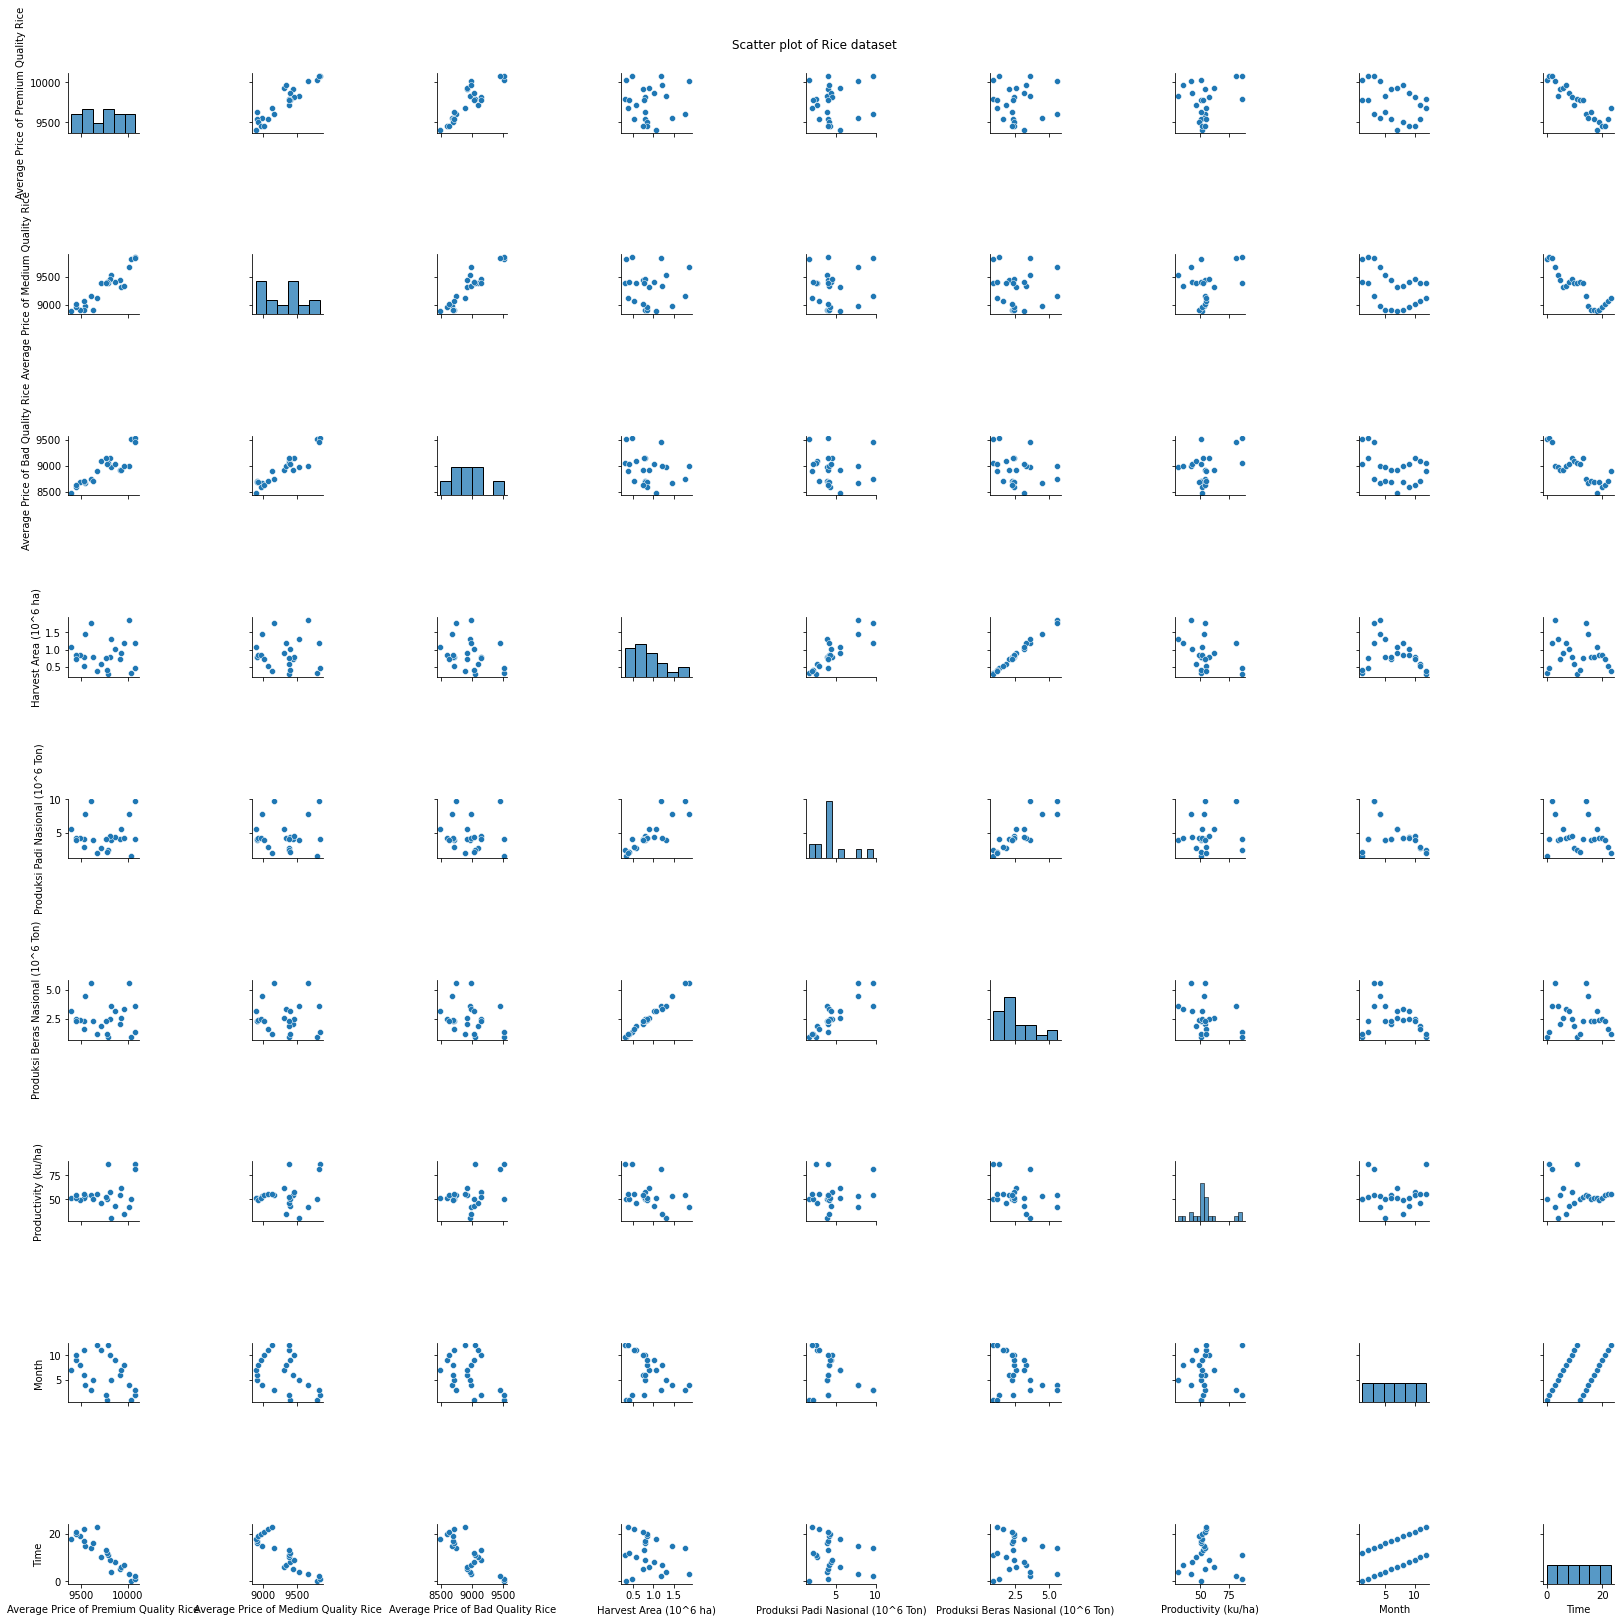

In [ ]:
df_plot = df.copy()

g = sns.pairplot(df_plot)
g.fig.suptitle('Scatter plot of Rice dataset')
plt.tight_layout()
plt.show()

    From the results of the Scatter plots above, the following analysis results are obtained: 
    There are several features that have a linear relationship, 
    namely the relationship between Average Price of Premium Quality Rice, Average Price of Medium Quality Rice, and Average Price of Bad Quality Rice. 
    In addition, between harvest area, National Rice Production, and National Rice Production. 
    As well as between time and month.

# 4. Feature Engineering

## Feature Scalling (Normalization)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
mmscalar_premium = MinMaxScaler()
df[['Average Price of Premium Quality Rice']] = mmscalar_premium.fit_transform(df[['Average Price of Premium Quality Rice']])

In [ ]:
mmscalar_medium = MinMaxScaler()
df[['Average Price of Medium Quality Rice']] = mmscalar_medium.fit_transform(df[['Average Price of Medium Quality Rice']])

In [ ]:
mmscalar_bad = MinMaxScaler()
df[['Average Price of Bad Quality Rice']] = mmscalar_bad.fit_transform(df[['Average Price of Bad Quality Rice']])

In [ ]:
mmscalar_prod = MinMaxScaler()
df[['Productivity (ku/ha)']] = mmscalar_prod.fit_transform(df[['Productivity (ku/ha)']])

##  Correlation Matrix

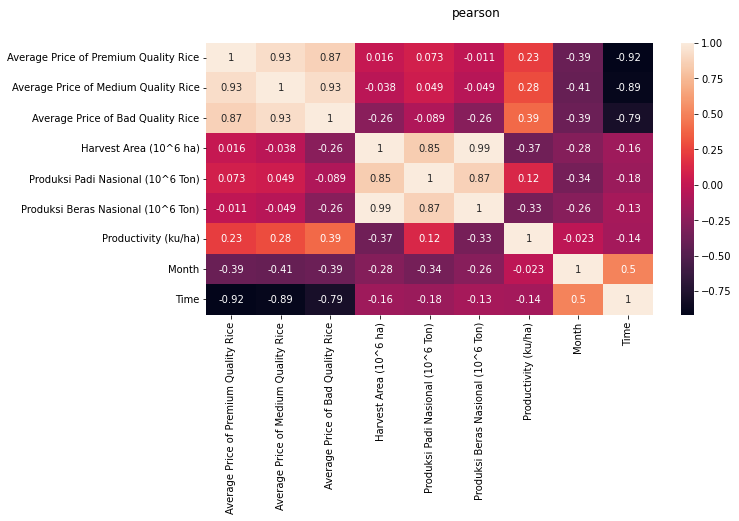

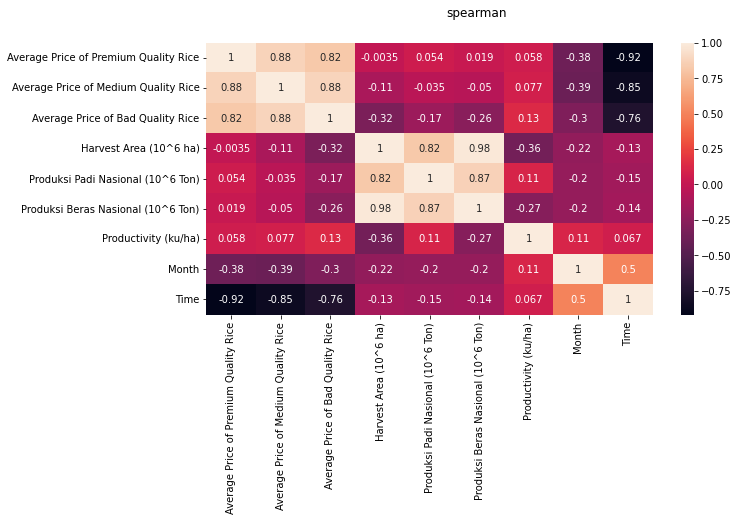

In [ ]:
items = ['pearson', 'spearman']
for item in items:
    fig, axe = plt.subplots(figsize=(10,5))
    fig.suptitle(item)
    sns.heatmap(df.corr(method=item, numeric_only=True), annot=True)
    plt.show()


# 4.1 Correlation for Average Price of Premium Quality Rice

In [ ]:
df.corr(method='pearson', numeric_only=True).sort_values('Average Price of Premium Quality Rice', ascending=False)['Average Price of Premium Quality Rice']

Average Price of Premium Quality Rice    1.000000
Average Price of Medium Quality Rice     0.927048
Average Price of Bad Quality Rice        0.871458
Productivity (ku/ha)                     0.227642
Produksi Padi Nasional (10^6 Ton)        0.073470
Harvest Area (10^6 ha)                   0.015777
Produksi Beras Nasional (10^6 Ton)      -0.010586
Month                                   -0.393286
Time                                    -0.916181
Name: Average Price of Premium Quality Rice, dtype: float64

By using Pearson, It seems like Average Price of Medium Quality Rice, Average Price of Bad Quality Rice, and Productivity (ku/ha) have a positive correlation with Average Price of Premium Quality Rice

In [ ]:
df.corr(method='spearman', numeric_only=True).sort_values('Average Price of Premium Quality Rice', ascending=False)['Average Price of Premium Quality Rice']

Average Price of Premium Quality Rice    1.000000
Average Price of Medium Quality Rice     0.877391
Average Price of Bad Quality Rice        0.823478
Productivity (ku/ha)                     0.058261
Produksi Padi Nasional (10^6 Ton)        0.053560
Produksi Beras Nasional (10^6 Ton)       0.019135
Harvest Area (10^6 ha)                  -0.003480
Month                                   -0.378380
Time                                    -0.919130
Name: Average Price of Premium Quality Rice, dtype: float64

Using Spearman, the features correlated with the Average Price of Premium Quality Rice are similar

# 4.2 Correlation for Average Price of Medium Quality Rice

In [ ]:
df.corr(method='pearson', numeric_only=True).sort_values('Average Price of Medium Quality Rice', ascending=False)['Average Price of Medium Quality Rice']

Average Price of Medium Quality Rice     1.000000
Average Price of Bad Quality Rice        0.930918
Average Price of Premium Quality Rice    0.927048
Productivity (ku/ha)                     0.283511
Produksi Padi Nasional (10^6 Ton)        0.049413
Harvest Area (10^6 ha)                  -0.037723
Produksi Beras Nasional (10^6 Ton)      -0.049327
Month                                   -0.410702
Time                                    -0.893049
Name: Average Price of Medium Quality Rice, dtype: float64

By using Pearson, It seems like Average Price of Premium Quality Rice, Average Price of Bad Quality Rice, and Productivity (ku/ha) have a positive correlation with Average Price of Medium Quality Rice

In [ ]:
df.corr(method='spearman', numeric_only=True).sort_values('Average Price of Medium Quality Rice', ascending=False)['Average Price of Medium Quality Rice']

Average Price of Medium Quality Rice     1.000000
Average Price of Bad Quality Rice        0.882609
Average Price of Premium Quality Rice    0.877391
Productivity (ku/ha)                     0.077391
Produksi Padi Nasional (10^6 Ton)       -0.034836
Produksi Beras Nasional (10^6 Ton)      -0.050011
Harvest Area (10^6 ha)                  -0.114398
Month                                   -0.390585
Time                                    -0.852174
Name: Average Price of Medium Quality Rice, dtype: float64

By using spearman, most of the correlated features with Average Price of Medium Quality Rice Rice are similar

# 4.3 Correlation for Average Price of Bad Quality Rice

In [ ]:
df.corr(method='pearson', numeric_only=True).sort_values('Average Price of Bad Quality Rice', ascending=False)['Average Price of Bad Quality Rice']

Average Price of Bad Quality Rice        1.000000
Average Price of Medium Quality Rice     0.930918
Average Price of Premium Quality Rice    0.871458
Productivity (ku/ha)                     0.394887
Produksi Padi Nasional (10^6 Ton)       -0.088542
Harvest Area (10^6 ha)                  -0.256293
Produksi Beras Nasional (10^6 Ton)      -0.259642
Month                                   -0.389132
Time                                    -0.794006
Name: Average Price of Bad Quality Rice, dtype: float64

By using Pearson, It seems like Average Price of Premium Quality Rice, Average Price of Medium Quality Rice, and Productivity (ku/ha) have a positive correlation with Average Price of Bad Quality Rice

In [ ]:
df.corr(method='spearman', numeric_only=True).sort_values('Average Price of Bad Quality Rice', ascending=False)['Average Price of Bad Quality Rice']

Average Price of Bad Quality Rice        1.000000
Average Price of Medium Quality Rice     0.882609
Average Price of Premium Quality Rice    0.823478
Productivity (ku/ha)                     0.134783
Produksi Padi Nasional (10^6 Ton)       -0.171130
Produksi Beras Nasional (10^6 Ton)      -0.257882
Month                                   -0.303401
Harvest Area (10^6 ha)                  -0.317094
Time                                    -0.756522
Name: Average Price of Bad Quality Rice, dtype: float64

By using spearman, most of the correlated features with Average Price of Bad Quality Rice Rice are similar

# 5. Split dataset to train and test datasets
    df_train is rice data from 2020
    df_test is rice data in 2021

In [ ]:
df_train = df.iloc[:12,:]
df_test = df.iloc[12:,:]

In [ ]:
# Training data
Time_train = df_train.loc[:, ['Time']]  # features
Monthly_train = df_train.loc[:, ['Month']]  # features
x_premium_train = df_train.loc[:, df_train.columns != 'Average Price of Premium Quality Rice'] # features
x_medium_train = df_train.loc[:, df_train.columns != 'Average Price of Medium Quality Rice'] # features
x_bad_train = df_train.loc[:, df_train.columns != 'Average Price of Bad Quality Rice'] # features
HargaBerasPremium_train = df_train.loc[:, 'Average Price of Premium Quality Rice']  # target
HargaBerasMedium_train = df_train.loc[:, 'Average Price of Medium Quality Rice']  # target
HargaBerasLuarkualitas_train = df_train.loc[:, 'Average Price of Bad Quality Rice'] # target

In [ ]:
# Test Data
Time_test = df_test.loc[:, ['Time']]  # features
Monthly_test = df_test.loc[:, ['Month']]  # features
x_premium_test = df_test.loc[:, df_test.columns != 'Average Price of Premium Quality Rice'] # features
x_medium_test = df_test.loc[:, df_test.columns != 'Average Price of Medium Quality Rice'] # features
x_bad_test = df_test.loc[:, df_test.columns != 'Average Price of Bad Quality Rice'] # features
HargaBerasPremium_test = df_test.loc[:, 'Average Price of Premium Quality Rice']  # target
HargaBerasMedium_test = df_test.loc[:, 'Average Price of Medium Quality Rice']  # target
HargaBerasLuarkualitas_test = df_test.loc[:, 'Average Price of Bad Quality Rice'] # target

In [ ]:
evaluation_train = {}
evaluation_test = {}

### SIMPLE LINEAR REGRESSION
### Average Price of Premium Quality Rice

In [ ]:
# Train the model
model = LinearRegression()
model.fit(Time_train, HargaBerasPremium_train)

# Koefisien model
print ('Coefficients: ', model.coef_)
print ('Intercept: ',model.intercept_)
accuracy = model.score(Time_train, HargaBerasPremium_train)
print("Model Accuracy: ", accuracy)

Coefficients:  [-0.04206538]
Intercept:  0.9928285950802902
Model Accuracy:  0.7385847672120971


Predicting on Train Data

In [ ]:
AvgPricePremium_train = pd.Series(model.predict(Time_train), index=Time_train.index)

eval(evaluation_train,HargaBerasPremium_train,AvgPricePremium_train,'Train SLR Premium')

Predicting on Test Data

In [ ]:
AvgPricePremium_pred = pd.Series(model.predict(Time_test), index=Time_test.index)

eval(evaluation_test,HargaBerasPremium_test,AvgPricePremium_pred,'Test SLR Premium')

### Multiple Linear Regression
### Average Price of Premium Quality Rice

In [ ]:
regr = LinearRegression()
regr.fit(x_premium_train,HargaBerasPremium_train)

print('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

accuracy = regr.score(x_premium_train,HargaBerasPremium_train)
print("Model Accuracy: ", accuracy)

Coefficients:  [-1.26194281  0.72589194 -0.33907459 -0.04161093  0.26441853  0.41694958
 -0.03766244 -0.03766244]
Intercept:  1.217579912867675
Model Accuracy:  0.9149158449946821


Predicting on Train Data

In [ ]:
AvgPricePremium_train_v2 = pd.Series(regr.predict(x_premium_train), index=x_premium_train.index)

eval(evaluation_train,HargaBerasPremium_train,AvgPricePremium_train_v2,'Train MLR Premium')

Predicting on Test Data

In [ ]:
AvgPricePremium_pred_v2 = pd.Series(regr.predict(x_premium_test), index=x_premium_test.index)

eval(evaluation_test,HargaBerasPremium_test,AvgPricePremium_pred_v2,'Test MLR Premium')

explain the model's predictions using SHAP

Shapley on Train Data

In [ ]:
explainer = shap.Explainer(regr, x_premium_train)
shap_values = explainer(x_premium_train)

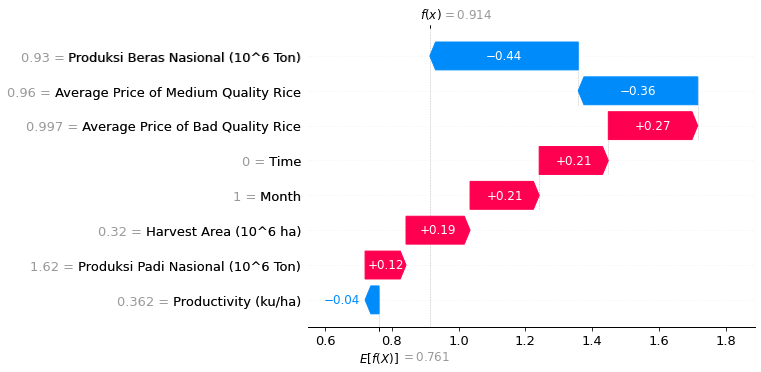

In [ ]:
shap.plots.waterfall(shap_values[0])

In [ ]:
shap_values = explainer.shap_values(x_premium_train)

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, x_premium_train,link="logit")

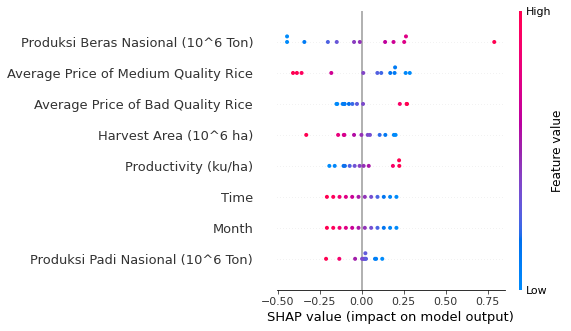

In [ ]:
shap.summary_plot(shap_values, x_premium_train)

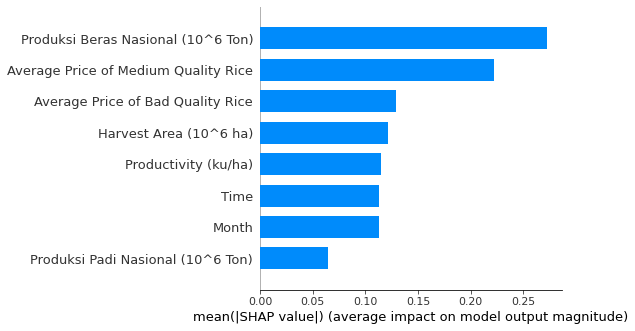

In [ ]:
shap.summary_plot(shap_values, x_premium_train, plot_type ="bar")

    The feature important that has the largest average SHAP value in the Multiple Linear Regression method on Average Price of Premium Quality Rice is  Produksi Beras Nasional. High values of the Produksi Beras Nasional variable have a high positive contribution on the prediction, while low values have a high negative contribution.

Shapley on Test Data

In [ ]:
explainer = shap.Explainer(regr, x_premium_test)
shap_values = explainer(x_premium_test)

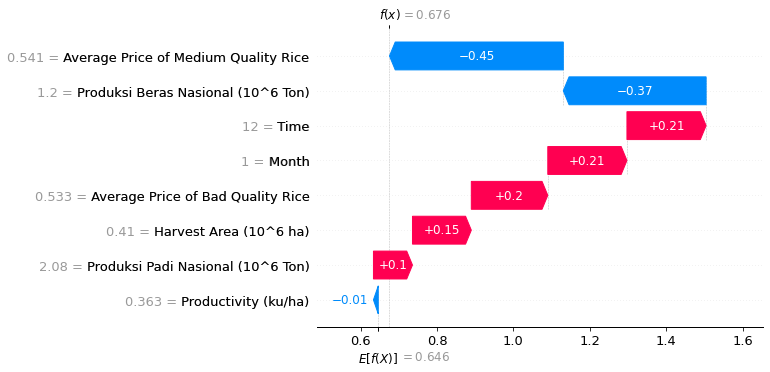

In [ ]:
shap.plots.waterfall(shap_values[0])

In [ ]:
shap_values = explainer.shap_values(x_premium_test)

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, x_premium_test,link="logit")

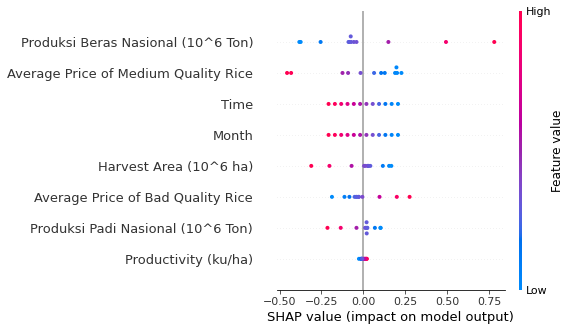

In [ ]:
shap.summary_plot(shap_values, x_premium_test)

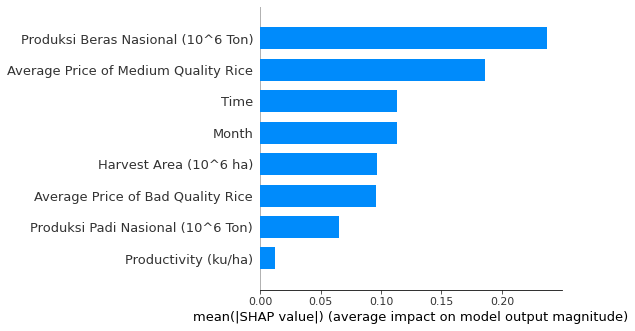

In [ ]:
shap.summary_plot(shap_values, x_premium_test, plot_type ="bar")

    The feature important that has the largest average SHAP value in the Multiple Linear Regression method on Average Price of Premium Quality Rice is  Produksi Beras Nasional. High values of the Produksi Beras Nasional variable have a high positive contribution on the prediction, while low values have a high negative contribution.

## Random Forest
### Average Price of Premium Quality Rice

In [ ]:
# Train the model
regressor = RandomForestRegressor(n_estimators = 1000, random_state=42)
regressor.fit(x_premium_train,HargaBerasPremium_train)

accuracy = regressor.score(x_premium_train,HargaBerasPremium_train)
print("Model Accuracy: ", accuracy)

Model Accuracy:  0.950213067717742


Predicting on Train Data

In [ ]:
AvgPricePremium_train_with_randomforest = pd.Series(regressor.predict(x_premium_train), index=x_premium_train.index)

eval(evaluation_train,HargaBerasPremium_train,AvgPricePremium_train_with_randomforest,'Train RF Premium')

Predicting on Test Data

In [ ]:
AvgPricePremium_pred_with_randomforest = pd.Series(regressor.predict(x_premium_test), index=x_premium_test.index)

eval(evaluation_test,HargaBerasPremium_test,AvgPricePremium_pred_with_randomforest,'Test RF Premium')

# explain the model's predictions using SHAP

In [ ]:
explainer = shap.TreeExplainer(regressor)

Shap Explanation at Train Data

In [ ]:
shap_values = explainer.shap_values(x_premium_train)

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values,x_premium_train,link="logit")

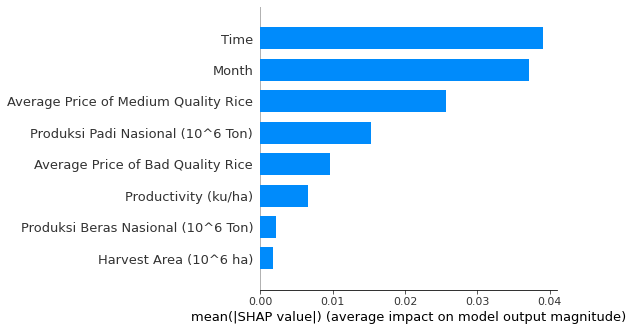

In [ ]:
shap.summary_plot(shap_values, x_premium_train, plot_type="bar")

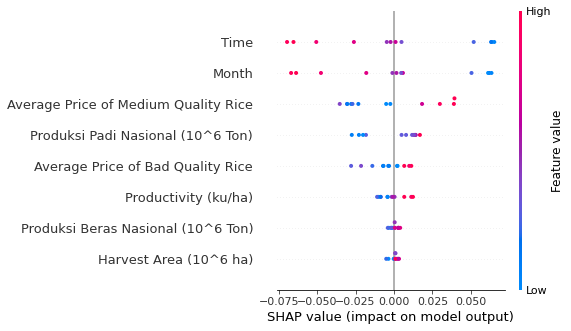

In [ ]:
shap.summary_plot(shap_values, x_premium_train)

    The feature important that has the largest average SHAP value in the Random Forest Regression method on Average Price of Premium Quality Rice is Time. High values of the Time variable have a high negative contribution on the prediction, while low values have a high positive contribution.

Shap Explanation at Test Data

In [ ]:
shap_values = explainer.shap_values(x_premium_test)

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values,x_premium_test,link="logit")

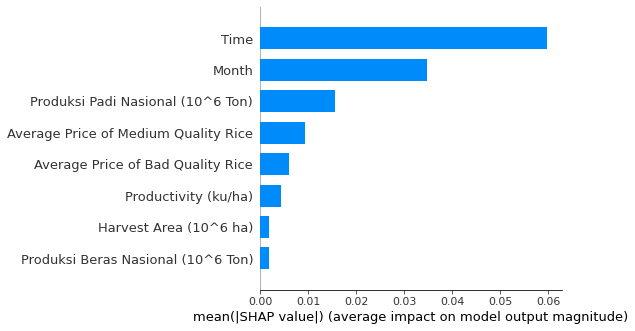

In [ ]:
shap.summary_plot(shap_values, x_premium_test, plot_type="bar")

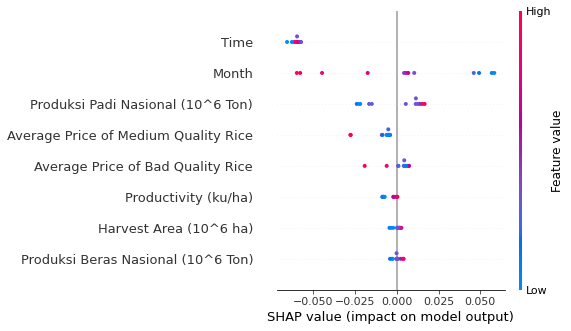

In [ ]:
shap.summary_plot(shap_values, x_premium_test)

    The feature important that has the largest average SHAP value in the Random Forest Regression method on Average Price of Premium Quality Rice is Time. High values of the Month variable have a high negative contribution on the prediction, while low values have a high positive contribution.

### SIMPLE LINEAR REGRESSION
### Average Price of Medium Quality Rice

In [ ]:
# Train the model
model2 = LinearRegression()
model2.fit(Time_train, HargaBerasMedium_train)

# Koefisien model
print ('Coefficients: ', model2.coef_)
print ('Intercept: ',model2.intercept_)

Coefficients:  [-0.04882043]
Intercept:  0.9442955997232405


Predicting on Train Data

In [ ]:
AvgPriceMedium_train = pd.Series(model2.predict(Time_train), index=Time_train.index)

eval(evaluation_train,HargaBerasMedium_train,AvgPriceMedium_train,'Train SLR Medium')

Predicting on Test Data

In [ ]:
AvgPriceMedium_pred = pd.Series(model2.predict(Time_test), index=Time_test.index)

eval(evaluation_test,HargaBerasMedium_test,AvgPriceMedium_pred,'Test SLR Medium')

### Multiple Linear Regression
### Average Price of Medium Quality Rice

In [ ]:
regr_v2 = LinearRegression()
regr_v2.fit(x_medium_train, HargaBerasMedium_train)

print('Coefficients: ', regr_v2.coef_)
print ('Intercept: ',regr_v2.intercept_)

accuracy = regr_v2.score(x_medium_train,HargaBerasMedium_train)
print("Model Accuracy: ", accuracy)

Coefficients:  [-0.38103032  0.54240185 -0.4008871  -0.03757661  0.2455859   0.276904
 -0.02293628 -0.02293628]
Intercept:  0.657979328969054
Model Accuracy:  0.9815094839906328


Predicting on Train Data

In [ ]:
AvgPriceMedium_train_v2 = pd.Series(regr_v2.predict(x_medium_train), index=x_medium_train.index)

eval(evaluation_train,HargaBerasMedium_train,AvgPriceMedium_train_v2,'Train MLR Medium')

Predicting on Test Data

In [ ]:
AvgPriceMedium_pred_v2 = pd.Series(regr_v2.predict(x_medium_test), index=x_medium_test.index)

eval(evaluation_test,HargaBerasMedium_test,AvgPriceMedium_pred_v2,'Test MLR Medium')

explain the model's predictions using SHAP

Shapley on Train Data

In [ ]:
explainer = shap.LinearExplainer(regr_v2, x_medium_train)
shap_values = explainer(x_medium_train)

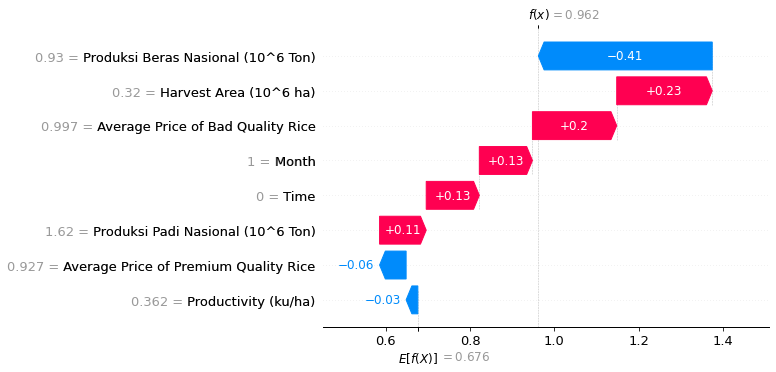

In [ ]:
shap.plots.waterfall(shap_values[0])

In [ ]:
shap_values_v2 = explainer.shap_values(x_medium_train)

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values_v2, x_medium_train,link="logit")

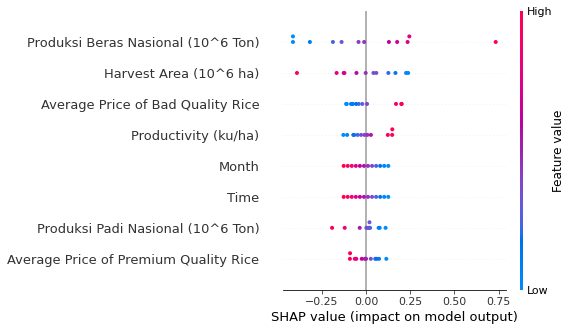

In [ ]:
shap.summary_plot(shap_values_v2, x_medium_train)

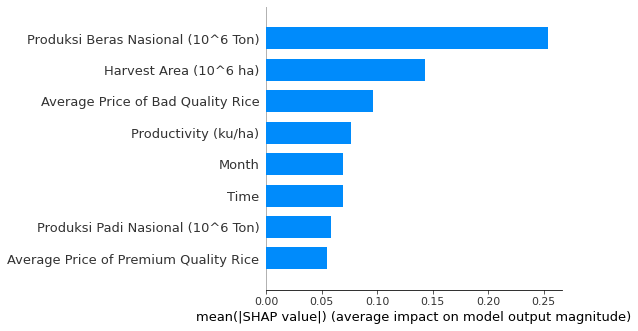

In [ ]:
shap.summary_plot(shap_values_v2, x_medium_test, plot_type ="bar")

    The feature important that has the largest average SHAP value in the Multiple Linear Regression method on Average Price of Medium Quality Rice is  Produksi Beras Nasional. High values of the Produksi Beras Nasional variable have a high positive contribution on the prediction, while low values have a high negative contribution.

Shapley on Test Data

In [ ]:
explainer_v2 = shap.LinearExplainer(regr_v2, x_medium_test)
shap_values_v2 = explainer_v2(x_medium_test)

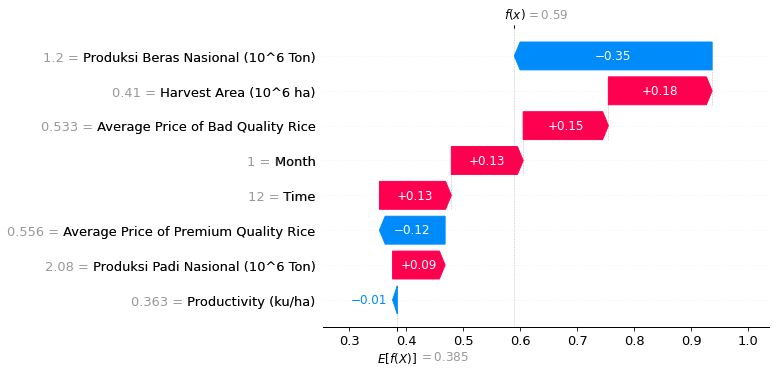

In [ ]:
shap.plots.waterfall(shap_values_v2[0])

In [ ]:
shap_values_v2 = explainer_v2.shap_values(x_medium_test)

In [ ]:
shap.initjs()
shap.force_plot(explainer_v2.expected_value, shap_values_v2, x_medium_test,link="logit")

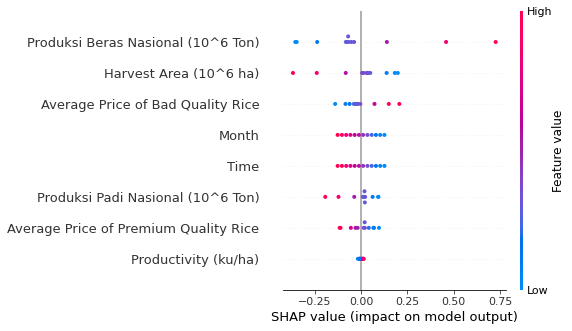

In [ ]:
shap.summary_plot(shap_values_v2, x_medium_test)

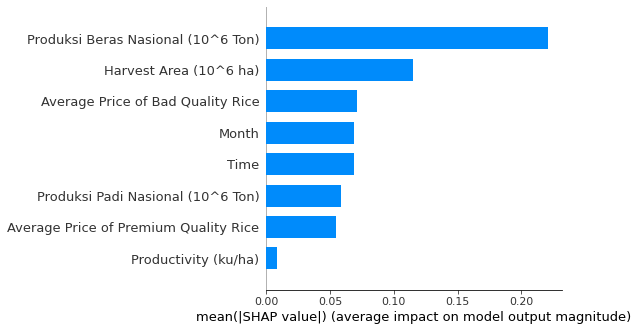

In [ ]:
shap.summary_plot(shap_values_v2, x_medium_test, plot_type ="bar")

    The feature important that has the largest average SHAP value in the Multiple Linear Regression method on Average Price of Medium Quality Rice is  Produksi Beras Nasional. High values of the Produksi Beras Nasional variable have a high positive contribution on the prediction, while low values have a high negative contribution.

## Random Forest
### Average Price of Medium Quality Rice

In [ ]:
# Train the model
regressor2 = RandomForestRegressor(n_estimators = 1000, random_state=42)
regressor2.fit(x_medium_train, HargaBerasMedium_train)

accuracy = regressor2.score(x_medium_train, HargaBerasMedium_train)
print("Model Accuracy: ", accuracy)

Model Accuracy:  0.9808812400659142


Predicting on Train Data

In [ ]:
AvgPriceMedium_train_with_randomforest = pd.Series(regressor2.predict(x_medium_train), index=x_medium_train.index)

eval(evaluation_train,HargaBerasMedium_train,AvgPriceMedium_train_with_randomforest,'Train RF Medium')

Predicting on Test Data

In [ ]:
AvgPriceMedium_pred_with_randomforest = pd.Series(regressor2.predict(x_medium_test), index=x_medium_test.index)

eval(evaluation_test,HargaBerasMedium_test,AvgPriceMedium_pred_with_randomforest,'Test RF Medium')

Explain the model's predictions using SHAP

In [ ]:
explainer = shap.TreeExplainer(regressor2)

Shapley on Train Data

In [ ]:
shap_values = explainer.shap_values(x_medium_train)

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, x_medium_train,link="logit")

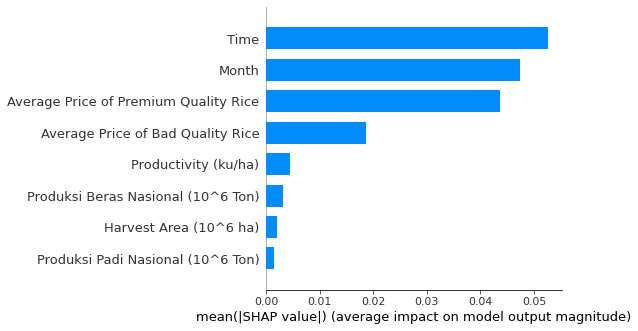

In [ ]:
shap.summary_plot(shap_values, x_medium_train, plot_type="bar")

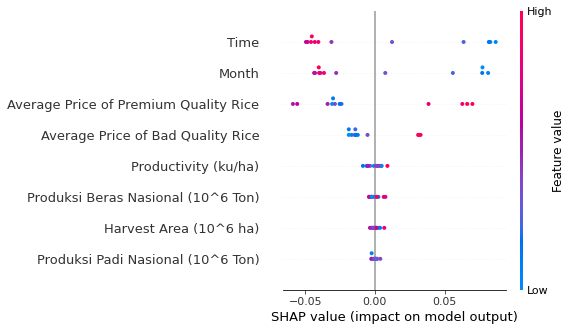

In [ ]:
shap.summary_plot(shap_values, x_medium_train)

    The feature important that has the largest average SHAP value in the Random Forest Regression method on Average Price of Medium Quality Rice is Time. High values of the Time variable have a high negative contribution on the prediction, while low values have a high positive contribution.

Shapley on Test Data

In [ ]:
shap_values = explainer.shap_values(x_medium_test)

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, x_medium_test,link="logit")

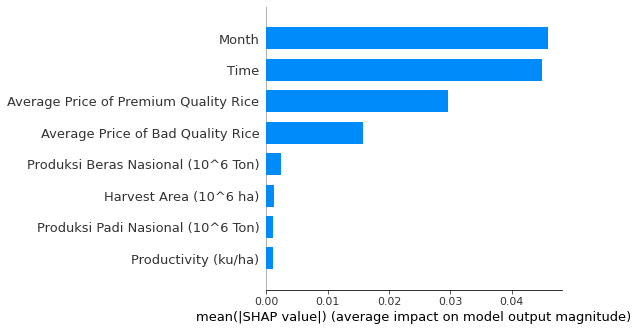

In [ ]:
shap.summary_plot(shap_values, x_medium_test, plot_type="bar")

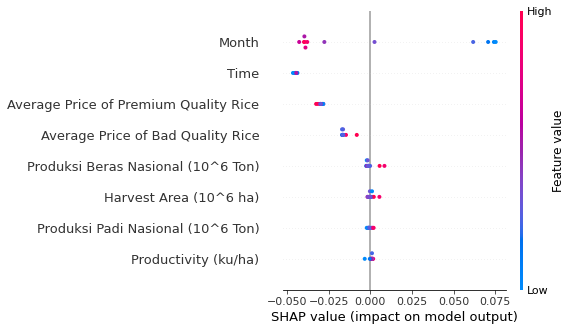

In [ ]:
shap.summary_plot(shap_values, x_medium_test)

    The feature important that has the largest average SHAP value in the Random Forest Regression method on Average Price of Medium Quality Rice is Month. High values of the Month variable have a high negative contribution on the prediction, while low values have a high positive contribution.

### SIMPLE LINEAR REGRESSION
### Average Price of Bad Quality Rice

In [ ]:
# Train the model
model3 = LinearRegression()
model3.fit(Time_train, HargaBerasLuarkualitas_train)

# Koefisien model
print ('Coefficients: ', model3.coef_)
print ('Intercept: ',model3.intercept_)

accuracy = model3.score(Time_train,HargaBerasLuarkualitas_train)
print("Model Accuracy: ", accuracy)

Coefficients:  [-0.03670048]
Intercept:  0.8298039096822395
Model Accuracy:  0.35770382490794417


Predicting on Train Data

In [ ]:
AvgPriceBad_train = pd.Series(model3.predict(Time_train), index=Time_train.index)

eval(evaluation_train,HargaBerasLuarkualitas_train,AvgPriceBad_train,'Train SLR Bad')

Predicting on Test Data

In [ ]:
AvgPriceBad_pred = pd.Series(model3.predict(Time_test), index=Time_test.index)

eval(evaluation_test,HargaBerasLuarkualitas_test,AvgPriceBad_pred,'Test SLR Bad')

### Multiple Linear Regression
### Average Price of Bad Quality Rice

In [ ]:
regr_v3 = LinearRegression()
regr_v3.fit(x_bad_train,HargaBerasLuarkualitas_train)

print('Coefficients: ', regr_v3.coef_)
print ('Intercept: ',regr_v3.intercept_)

accuracy = regr_v3.score(x_bad_train,HargaBerasLuarkualitas_train)
print("Model Accuracy: ", accuracy)

Coefficients:  [ 0.58831158  1.45591736  0.19622885  0.05654161 -0.24529267 -0.39723509
  0.02905246  0.02905246]
Intercept:  -0.7604628560861636
Model Accuracy:  0.9561253792084915


Predicting on Train Data

In [ ]:
AvgPriceBad_train_v2 = pd.Series(regr_v3.predict(x_bad_train), index=x_bad_train.index)

eval(evaluation_train,HargaBerasLuarkualitas_train,AvgPriceBad_train_v2,'Train MLR Bad')

Predicting on Test Data

In [ ]:
AvgPriceBad_pred_v2 = pd.Series(regr_v3.predict(x_bad_test), index=x_bad_test.index)

eval(evaluation_test,HargaBerasLuarkualitas_test,AvgPriceBad_pred_v2,'Test MLR Bad')

Explain the model's predictions using SHAP

Shapley on Train Data

In [ ]:
explainer = shap.LinearExplainer(regr_v3, x_bad_train)
shap_values = explainer(x_bad_train)

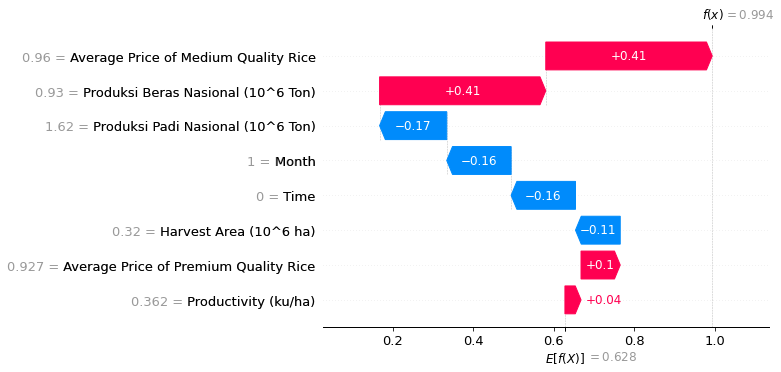

In [ ]:
shap.plots.waterfall(shap_values[0])

In [ ]:
shap_values = explainer.shap_values(x_bad_train)

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, x_bad_train,link="logit")

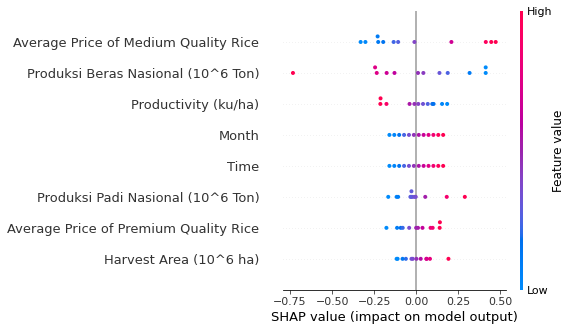

In [ ]:
shap.summary_plot(shap_values, x_bad_train)

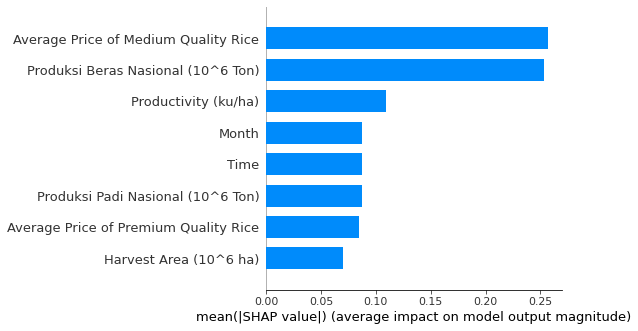

In [ ]:
shap.summary_plot(shap_values, x_bad_train, plot_type ="bar")

    The feature important that has the largest average SHAP value in the Multiple Linear Regression method on Average Price of Bad Quality Rice is Average Price of Medium Quality Rice. High values of the Average Price of Medium Quality Rice variable have a high positive contribution on the prediction, while low values have a high negative contribution.

Shapley on Test Data

In [ ]:
explainer_v3 = shap.LinearExplainer(regr_v3, x_bad_test)
shap_values_v3 = explainer_v3(x_bad_test)

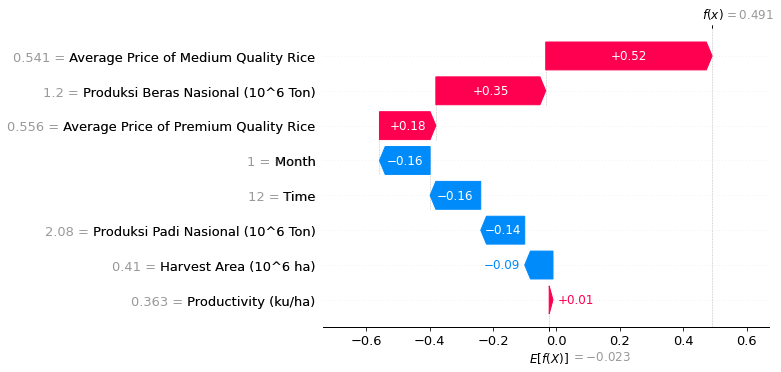

In [ ]:
shap.plots.waterfall(shap_values_v3[0])

In [ ]:
shap_values_v3 = explainer_v3.shap_values(x_bad_test)

In [ ]:
shap.initjs()
shap.force_plot(explainer_v3.expected_value, shap_values_v3, x_bad_test,link="logit")

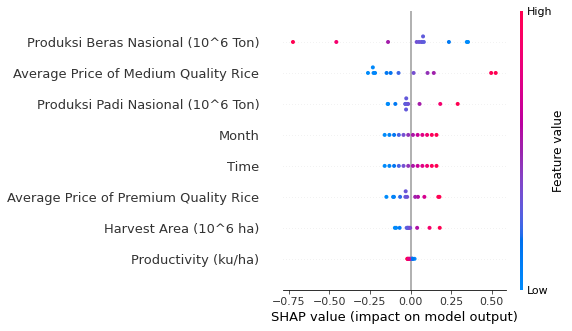

In [ ]:
shap.summary_plot(shap_values_v3, x_bad_test)

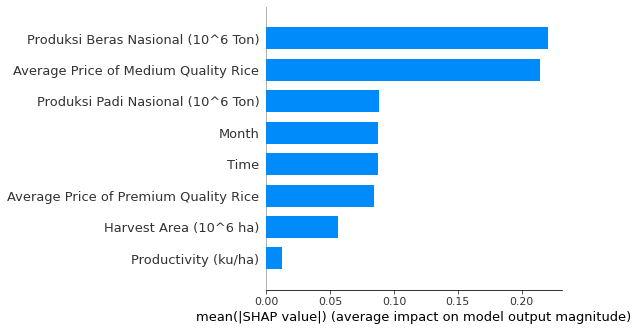

In [ ]:
shap.summary_plot(shap_values_v3, x_bad_test, plot_type ="bar")

    The feature important that has the largest average SHAP value in the Multiple Linear Regression method on Bad Quality Rice is Produksi Beras Nasional. High values of the Produksi Beras Nasional variable have a high negative contribution on the prediction, while low values have a high positive contribution.

## Random Forest
### Average Price of Bad Quality Rice

In [ ]:
# Train the model
regressor3 = RandomForestRegressor(n_estimators = 1000, random_state=42)
regressor3.fit(x_bad_train, HargaBerasLuarkualitas_train)

accuracy = regressor3.score(x_bad_train, HargaBerasLuarkualitas_train)
print("Model Accuracy: ", accuracy)

Model Accuracy:  0.9476249578458837


Predicting on Train Data

In [ ]:
AvgPriceBad_train_with_randomforest = pd.Series(regressor3.predict(x_bad_train), index=x_bad_train.index)

eval(evaluation_train,HargaBerasLuarkualitas_train,AvgPriceBad_train_with_randomforest,'Train RF Bad')

Predicting on Test Data

In [ ]:
AvgPriceBad_pred_with_randomforest = pd.Series(regressor3.predict(x_bad_test), index=x_bad_test.index)

eval(evaluation_test,HargaBerasLuarkualitas_test,AvgPriceBad_pred_with_randomforest,'Test RF Bad')

Explain the model's predictions using SHAP

In [ ]:
explainer = shap.TreeExplainer(regressor3)

Shapley on Train Data

In [ ]:
shap_values = explainer.shap_values(x_bad_train)

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, x_bad_train,link="logit")

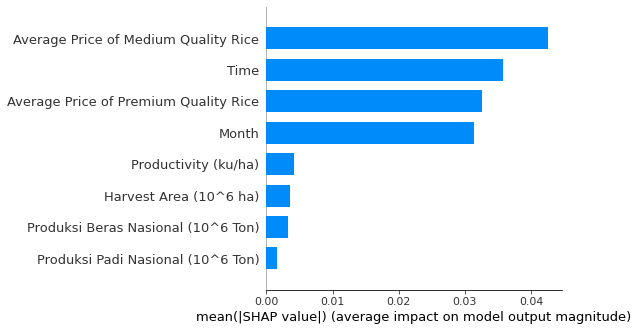

In [ ]:
shap.summary_plot(shap_values, x_bad_train, plot_type="bar")

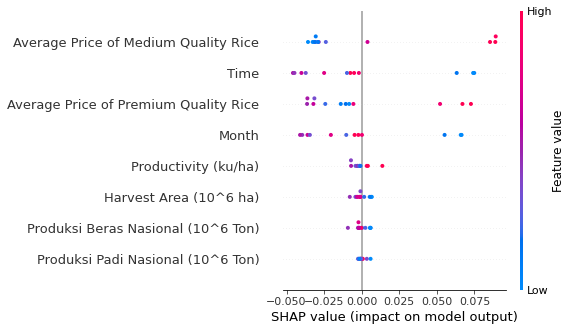

In [ ]:
shap.summary_plot(shap_values, x_bad_train)

    The feature important that has the largest average SHAP value in the Random Forest Regression method on Average Price of Bad Quality Rice is Average Price of Medium Quality Rice. High values of the Average Price of Medium Quality Rice variable have a high positive contribution on the prediction, while low values have a high negative contribution.

Shapley on Test Data

In [ ]:
shap_values = explainer.shap_values(x_bad_test)

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, x_bad_test,link="logit")

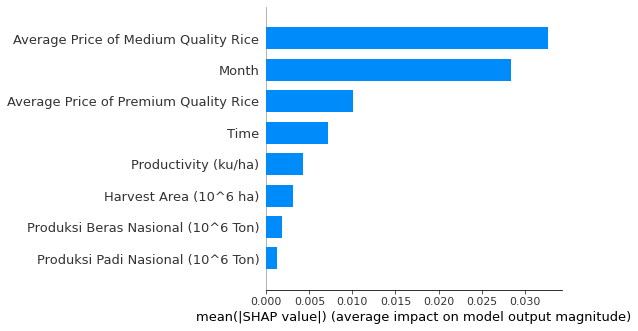

In [ ]:
shap.summary_plot(shap_values, x_bad_test, plot_type="bar")

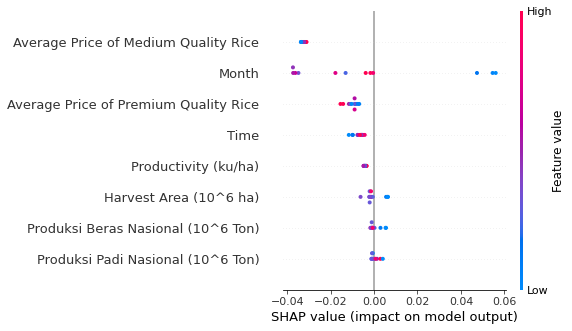

In [ ]:
shap.summary_plot(shap_values, x_bad_test)

    The feature important that has the largest average SHAP value in the Random Forest Regression method on Average Price of Bad Quality Rice is Average Price of Medium Quality Rice. 

Returns the MinMaxScaler value to get the actual data 

Premium Rice

In [ ]:
HargaBerasPremium_test = HargaBerasPremium_test.to_numpy()
HargaBerasPremium_test = np.reshape(HargaBerasPremium_test, (-1,1)) 
HargaBerasPremium_test = mmscalar_premium.inverse_transform(HargaBerasPremium_test)
HargaBerasPremium_test = np.reshape(HargaBerasPremium_test, (12,))
HargaBerasPremium_test = pd.Series(HargaBerasPremium_test, index=x_premium_test.index)

In [ ]:
AvgPricePremium_pred = AvgPricePremium_pred.to_numpy()
AvgPricePremium_pred = np.reshape(AvgPricePremium_pred, (-1,1)) 
AvgPricePremium_pred = mmscalar_premium.inverse_transform(AvgPricePremium_pred)
AvgPricePremium_pred = np.reshape(AvgPricePremium_pred, (12,))
AvgPricePremium_pred = pd.Series(AvgPricePremium_pred, index=x_premium_test.index)

In [ ]:
AvgPricePremium_pred_v2 = AvgPricePremium_pred_v2.to_numpy()
AvgPricePremium_pred_v2 = np.reshape(AvgPricePremium_pred_v2, (-1,1)) 
AvgPricePremium_pred_v2 = mmscalar_premium.inverse_transform(AvgPricePremium_pred_v2)
AvgPricePremium_pred_v2 = np.reshape(AvgPricePremium_pred_v2, (12,))
AvgPricePremium_pred_v2 = pd.Series(AvgPricePremium_pred_v2, index=x_premium_test.index)

In [ ]:
AvgPricePremium_pred_with_randomforest = AvgPricePremium_pred_with_randomforest.to_numpy()
AvgPricePremium_pred_with_randomforest = np.reshape(AvgPricePremium_pred_with_randomforest, (-1,1)) 
AvgPricePremium_pred_with_randomforest = mmscalar_premium.inverse_transform(AvgPricePremium_pred_with_randomforest)
AvgPricePremium_pred_with_randomforest = np.reshape(AvgPricePremium_pred_with_randomforest, (12,))
AvgPricePremium_pred_with_randomforest = pd.Series(AvgPricePremium_pred_with_randomforest, index=x_premium_test.index)

Medium

In [ ]:
HargaBerasMedium_test = HargaBerasMedium_test.to_numpy()
HargaBerasMedium_test = np.reshape(HargaBerasMedium_test, (-1,1)) 
HargaBerasMedium_test = mmscalar_medium.inverse_transform(HargaBerasMedium_test)
HargaBerasMedium_test = np.reshape(HargaBerasMedium_test, (12,))
HargaBerasMedium_test = pd.Series(HargaBerasMedium_test, index=x_medium_test.index)

In [ ]:
AvgPriceMedium_pred = AvgPriceMedium_pred.to_numpy()
AvgPriceMedium_pred = np.reshape(AvgPriceMedium_pred, (-1,1)) 
AvgPriceMedium_pred = mmscalar_medium.inverse_transform(AvgPriceMedium_pred)
AvgPriceMedium_pred = np.reshape(AvgPriceMedium_pred, (12,))
AvgPriceMedium_pred = pd.Series(AvgPriceMedium_pred, index=x_medium_test.index)

In [ ]:
AvgPriceMedium_pred_v2 = AvgPriceMedium_pred_v2.to_numpy()
AvgPriceMedium_pred_v2 = np.reshape(AvgPriceMedium_pred_v2, (-1,1)) 
AvgPriceMedium_pred_v2 = mmscalar_medium.inverse_transform(AvgPriceMedium_pred_v2)
AvgPriceMedium_pred_v2 = np.reshape(AvgPriceMedium_pred_v2, (12,))
AvgPriceMedium_pred_v2 = pd.Series(AvgPriceMedium_pred_v2, index=x_medium_test.index)

In [ ]:
AvgPriceMedium_pred_with_randomforest = AvgPriceMedium_pred_with_randomforest.to_numpy()
AvgPriceMedium_pred_with_randomforest = np.reshape(AvgPriceMedium_pred_with_randomforest, (-1,1)) 
AvgPriceMedium_pred_with_randomforest = mmscalar_medium.inverse_transform(AvgPriceMedium_pred_with_randomforest)
AvgPriceMedium_pred_with_randomforest = np.reshape(AvgPriceMedium_pred_with_randomforest, (12,))
AvgPriceMedium_pred_with_randomforest = pd.Series(AvgPriceMedium_pred_with_randomforest, index=x_medium_test.index)

Bad

In [ ]:
HargaBerasLuarkualitas_test= HargaBerasLuarkualitas_test.to_numpy()
HargaBerasLuarkualitas_test= np.reshape(HargaBerasLuarkualitas_test, (-1,1)) 
HargaBerasLuarkualitas_test= mmscalar_bad.inverse_transform(HargaBerasLuarkualitas_test)
HargaBerasLuarkualitas_test= np.reshape(HargaBerasLuarkualitas_test, (12,))
HargaBerasLuarkualitas_test= pd.Series(HargaBerasLuarkualitas_test, index=x_bad_test.index)

In [ ]:
AvgPriceBad_pred= AvgPriceBad_pred.to_numpy()
AvgPriceBad_pred= np.reshape(AvgPriceBad_pred, (-1,1)) 
AvgPriceBad_pred= mmscalar_bad.inverse_transform(AvgPriceBad_pred)
AvgPriceBad_pred= np.reshape(AvgPriceBad_pred, (12,))
AvgPriceBad_pred= pd.Series(AvgPriceBad_pred, index=x_bad_test.index)

In [ ]:
AvgPriceBad_pred_v2= AvgPriceBad_pred_v2.to_numpy()
AvgPriceBad_pred_v2= np.reshape(AvgPriceBad_pred_v2, (-1,1)) 
AvgPriceBad_pred_v2= mmscalar_bad.inverse_transform(AvgPriceBad_pred_v2)
AvgPriceBad_pred_v2= np.reshape(AvgPriceBad_pred_v2, (12,))
AvgPriceBad_pred_v2= pd.Series(AvgPriceBad_pred_v2, index=x_bad_test.index)

In [ ]:
AvgPriceBad_pred_with_randomforest= AvgPriceBad_pred_with_randomforest.to_numpy()
AvgPriceBad_pred_with_randomforest= np.reshape(AvgPriceBad_pred_with_randomforest, (-1,1)) 
AvgPriceBad_pred_with_randomforest= mmscalar_bad.inverse_transform(AvgPriceBad_pred_with_randomforest)
AvgPriceBad_pred_with_randomforest= np.reshape(AvgPriceBad_pred_with_randomforest, (12,))
AvgPriceBad_pred_with_randomforest= pd.Series(AvgPriceBad_pred_with_randomforest, index=x_bad_test.index)

### Collection of Visualizations

In [ ]:
plt.style.use("seaborn-whitegrid")
plt.rc("figure", figsize=(11, 4))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)
%config InlineBackend.figure_format = 'retina'

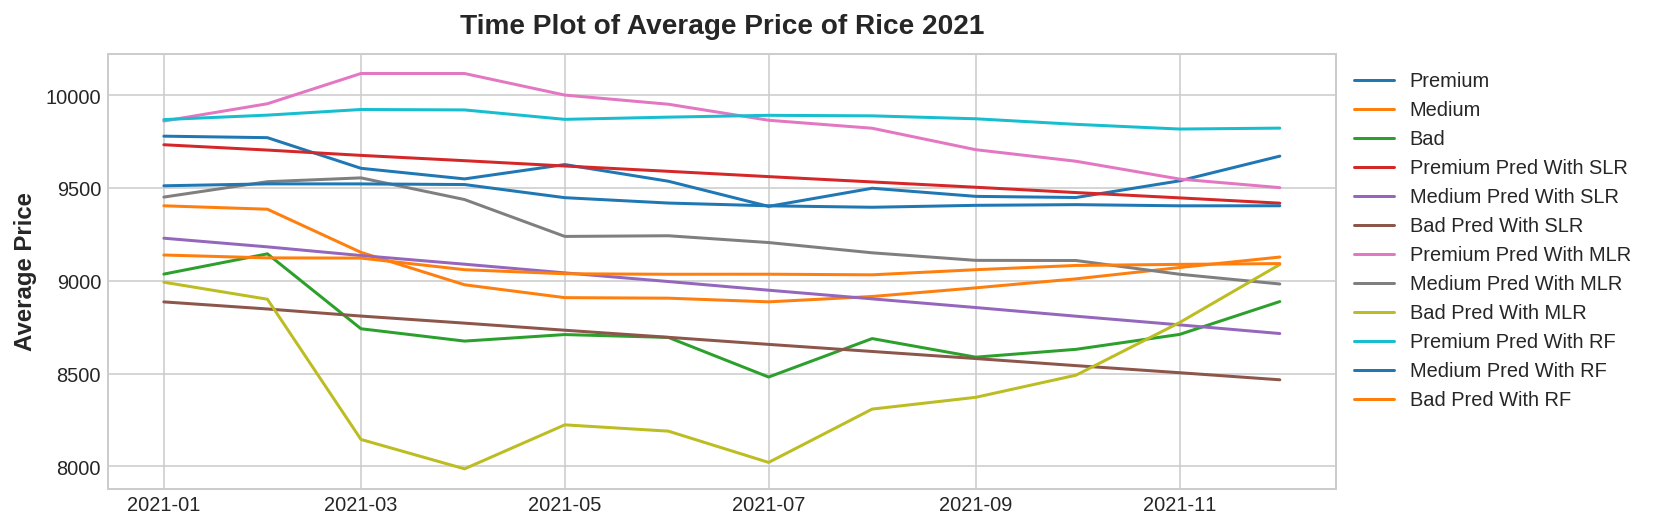

In [ ]:
plt.plot(HargaBerasPremium_test,label='Premium') 
plt.plot(HargaBerasMedium_test,label='Medium') 
plt.plot(HargaBerasLuarkualitas_test,label='Bad')
plt.plot(AvgPricePremium_pred,label='Premium Pred With SLR')
plt.plot(AvgPriceMedium_pred,label='Medium Pred With SLR')
plt.plot(AvgPriceBad_pred,label='Bad Pred With SLR')
plt.plot(AvgPricePremium_pred_v2,label='Premium Pred With MLR')
plt.plot(AvgPriceMedium_pred_v2,label='Medium Pred With MLR')
plt.plot(AvgPriceBad_pred_v2,label='Bad Pred With MLR')
plt.plot(AvgPricePremium_pred_with_randomforest,label='Premium Pred With RF')
plt.plot(AvgPriceMedium_pred_with_randomforest,label='Medium Pred With RF')
plt.plot(AvgPriceBad_pred_with_randomforest,label='Bad Pred With RF')
plt.title('Time Plot of Average Price of Rice 2021' )
plt.ylabel("Average Price")
plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper left')
plt.show()

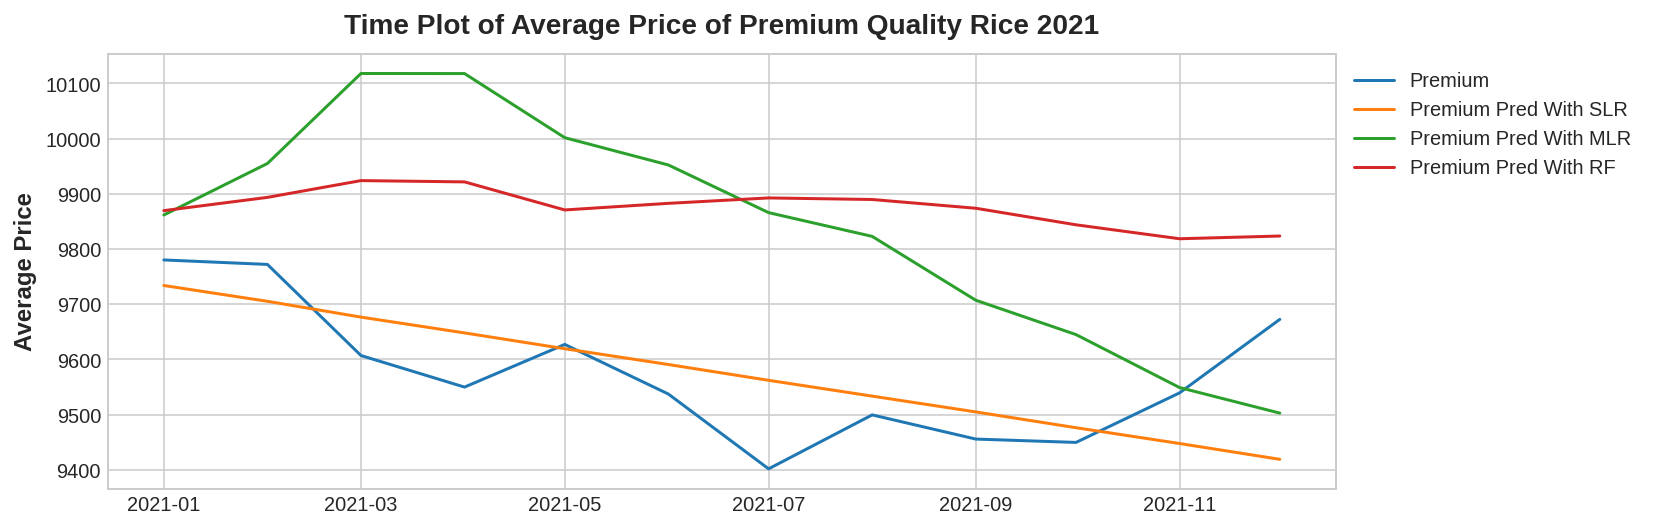

In [ ]:
plt.plot(HargaBerasPremium_test,label='Premium') 
plt.plot(AvgPricePremium_pred,label='Premium Pred With SLR')
plt.plot(AvgPricePremium_pred_v2,label='Premium Pred With MLR')
plt.plot(AvgPricePremium_pred_with_randomforest,label='Premium Pred With RF')
plt.title('Time Plot of Average Price of Premium Quality Rice 2021')
plt.ylabel("Average Price")
plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper left')
plt.show()

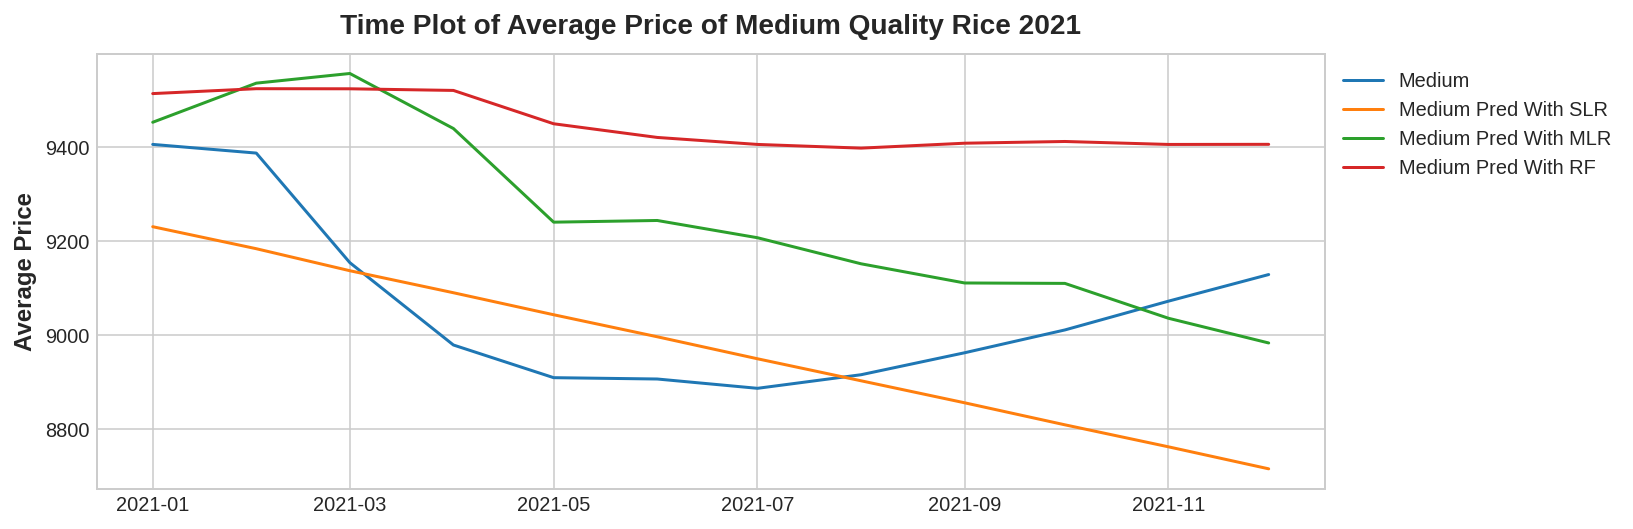

In [ ]:
plt.plot(HargaBerasMedium_test,label='Medium') 
plt.plot(AvgPriceMedium_pred,label='Medium Pred With SLR')
plt.plot(AvgPriceMedium_pred_v2,label='Medium Pred With MLR')
plt.plot(AvgPriceMedium_pred_with_randomforest,label='Medium Pred With RF')
plt.title('Time Plot of Average Price of Medium Quality Rice 2021')
plt.ylabel("Average Price")
plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper left')
plt.show()

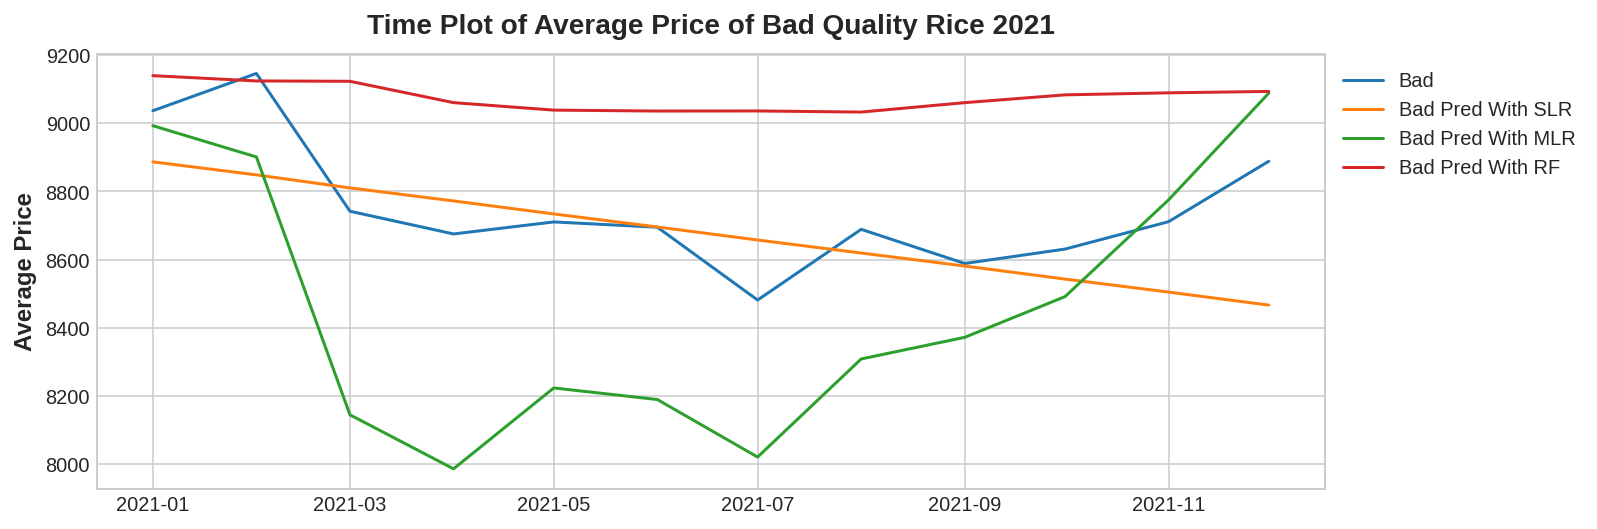

In [ ]:
plt.plot(HargaBerasLuarkualitas_test,label='Bad')  
plt.plot(AvgPriceBad_pred,label='Bad Pred With SLR')
plt.plot(AvgPriceBad_pred_v2,label='Bad Pred With MLR')
plt.plot(AvgPriceBad_pred_with_randomforest,label='Bad Pred With RF')
plt.title('Time Plot of Average Price of Bad Quality Rice 2021' )
plt.ylabel("Average Price")
plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper left')
plt.show()

Mean Absolute Error (MAE) 

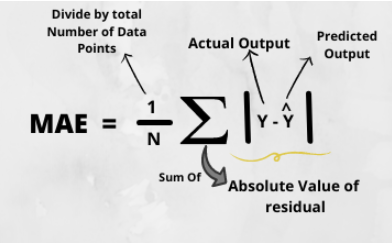

Mean Squared Error(MSE)

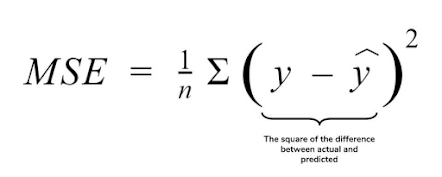

Mean Absolute Percentage Error (MAPE)

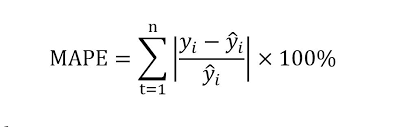

Root Mean Squared Error(RMSE) or root-mean-square deviation (RNSD)

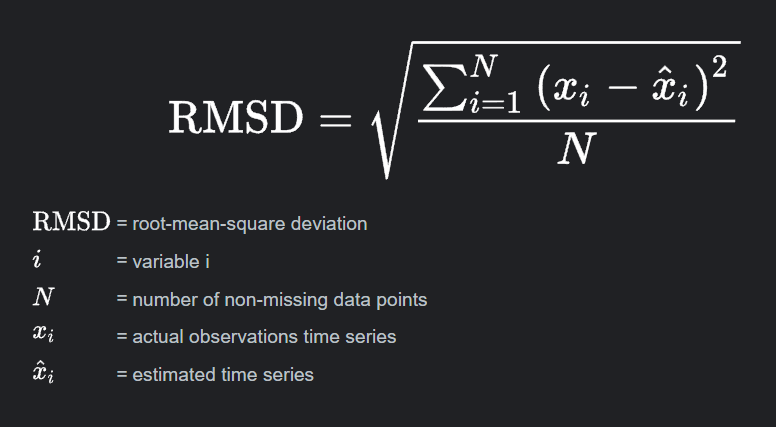


Root Mean Squared Log Error(RMSLE)

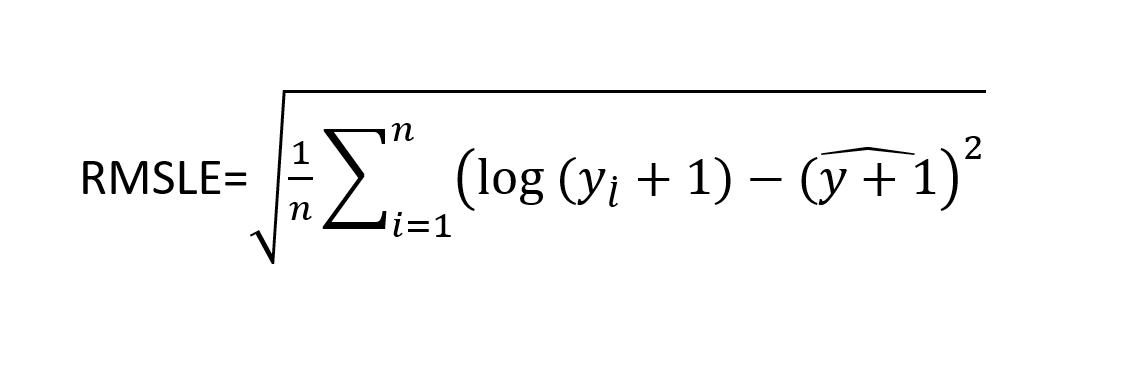

R Squared

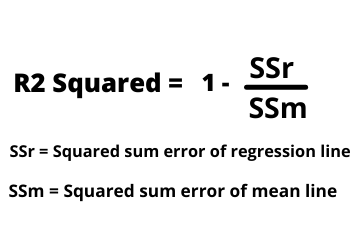

In [ ]:
data_eval_train = pd.DataFrame(evaluation_train)
data_eval_train

Train SLR Premium  Train MLR Premium  Train RF Premium  \
MAE                 0.068596           0.036517          0.030847   
MSE                 0.007463           0.002429          0.001421   
MAPE                0.098361           0.052338          0.044777   
R squared           0.738585           0.914916          0.950213   
RMSE                0.086391           0.049286          0.037702   
RMSLE              -2.448874          -3.010109         -3.278053   

           Train SLR Medium  Train MLR Medium  Train RF Medium  Train SLR Bad  \
MAE                0.091310          0.017301         0.024460       0.158468   
MSE                0.011264          0.000733         0.000758       0.028821   
MAPE               0.155548          0.030987         0.038588       0.276622   
R squared          0.716035          0.981509         0.980881       0.357704   
RMSE               0.106131          0.027082         0.027539       0.169768   
RMSLE             -2.243077         -3.608873        -3.592167      -1.773324   

           Train MLR Bad  Train RF Bad  
MAE             0.029257      0.038172  
MSE             0.001969      0.002350  
MAPE            0.060494      0.062776  
R squared       0.956125      0.947625  
RMSE            0.044370      0.048479  
RMSLE          -3.115181     -3.026634

In [ ]:
data_eval_test = pd.DataFrame(evaluation_test)
data_eval_test

Test SLR Premium  Test MLR Premium  Test RF Premium  \
MAE            1.172759e-01      4.342967e-01     4.423169e-01   
MSE            2.280550e-02      2.495102e-01     2.274863e-01   
MAPE           8.844011e+13      2.559672e+14     2.706555e+14   
R squared      2.234390e-01     -7.496191e+00    -6.746245e+00   
RMSE           1.510149e-01      4.995099e-01     4.769552e-01   
RMSLE         -1.890377e+00     -6.941278e-01    -7.403326e-01   

           Test SLR Medium  Test MLR Medium  Test RF Medium  Test SLR Bad  \
MAE           1.596650e-01     2.356701e-01    4.055952e-01  1.286091e-01   
MSE           3.928469e-02     7.556108e-02    1.870656e-01  2.999659e-02   
MAPE          2.459262e+13     1.253395e+14    2.030016e+14  6.349895e+13   
R squared    -2.188751e-01    -1.344412e+00   -4.804031e+00 -1.039689e-02   
RMSE          1.982037e-01     2.748838e-01    4.325108e-01  1.731952e-01   
RMSLE        -1.618460e+00    -1.291407e+00   -8.381480e-01 -1.753336e+00   

           Test MLR Bad   Test RF Bad  
MAE        3.224652e-01  3.174642e-01  
MSE        1.425154e-01  1.204739e-01  
MAPE       1.660655e+14  1.999832e+14  
R squared -3.800450e+00 -3.058012e+00  
RMSE       3.775121e-01  3.470936e-01  
RMSLE     -9.741526e-01 -1.058161e+00

In [ ]:
AvgPricePremium_pred_v2

Date
2021-01-01     9861.645066
2021-02-01     9954.986107
2021-03-01    10118.143547
2021-04-01    10117.999365
2021-05-01    10001.764267
2021-06-01     9952.342018
2021-07-01     9865.952047
2021-08-01     9822.890816
2021-09-01     9707.190911
2021-10-01     9644.928170
2021-11-01     9548.894727
2021-12-01     9502.592464
dtype: float64